<a href="https://colab.research.google.com/github/enikolaev/MMO/blob/main/Lesson%2011.%20Dimensionality%20Reduction%20for%20Complex%20data%20visualization/LabWork11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лаборатороная работа 11. Анализ многомерных данных с использованием методов снижения размерности

In [1]:
# подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Загрузка набора данных Fashion MNIST

In [2]:
# Загрузка изображений (60000) обучающей выборки
!curl -O http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz

# Загрузка меток (60000) для обучающей выборки
!curl -O http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz

# Загрузка изображений (10000) тестовой выборки
!curl -O http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz

# Загрузка меток (10000) для тестовой выборки
!curl -O http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.1M  100 25.1M    0     0   9.9M      0  0:00:02  0:00:02 --:--:--  9.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29515  100 29515    0     0  63018      0 --:--:-- --:--:-- --:--:-- 63066
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4318k  100 4318k    0     0  2893k      0  0:00:01  0:00:01 --:--:-- 2892k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5148  100  5148    0     0  15446      0 --:--:-- --:--:-- --:--:-- 15459


In [3]:
# Извлечение idx-файлов из архивов gz
!gzip -d *.gz

## Чтение файлов idx

In [4]:
# Выполним установку библиотеки, преобразующей idx-формат в массивы numpy
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=d06e97969aff95bd2fa0fa0d8c01c9481148f1206a14ac6aeb6eec0abe175174
  Stored in directory: /root/.cache/pip/wheels/87/e5/e7/70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


In [5]:
# Чтение idx-файлов в массивы numpy
import idx2numpy
train_data = idx2numpy.convert_from_file('./train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file('./train-labels-idx1-ubyte')

test_data = idx2numpy.convert_from_file('./t10k-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file('./t10k-labels-idx1-ubyte')

print(f'Train data {train_data.shape} \tTrain labels {train_labels.shape}')
print(f'Test data {test_data.shape} \tTest labels {test_labels.shape}')

Train data (60000, 28, 28) 	Train labels (60000,)
Test data (10000, 28, 28) 	Test labels (10000,)


In [6]:
# Экземпляр обучающей выборки - это матрица размером 28 x 28
print('Экземпляр обучающей выборки (Google Colab выполняет визуалзацию автоматически): ')
train_data[0]

Экземпляр обучающей выборки (Google Colab выполняет визуалзацию автоматически): 


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [7]:
# Для экземпляра обучающей выборки с индексом 0 получим метку
print('Метка экземпляра обучающей выборки: ')
train_labels[0]

Метка экземпляра обучающей выборки: 


np.uint8(9)

В наборе данных Fashion-MNIST используются следующие метки:

Label | Description
---|---
0	| T-shirt/top
1	| Trouser
2	| Pullover
3	| Dress
4	| Coat
5	| Sandal
6	| Shirt
7	| Sneaker
8	| Bag
9	| Ankle boot

In [8]:
# Подготовим словарь для названий меок
lnames = {0:	'T-shirt/top', 1:	'Trouser', 2:	'Pullover', 3:	'Dress', 4:	'Coat', 5:	'Sandal',
          6: 'Shirt', 7:	'Sneaker', 8:	'Bag', 9:	'Ankle boot'}

rows:2, cols 5


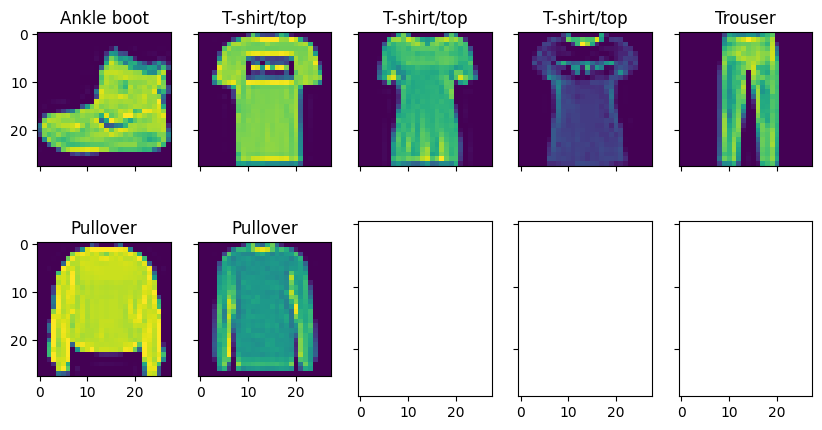

In [9]:
# Выполним визуализацию нескольких экземпляров обучающей выборки
from math import ceil
# Индексы для визуализации
indexes = [0, 1, 10, 34, 16, 7, 45]
IMAGES_IN_ROW = 5
ROWS = ceil(len(indexes) / IMAGES_IN_ROW)
COLS = min(len(indexes), IMAGES_IN_ROW)
print(f"rows:{ROWS}, cols {COLS}")
fig, ax = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(10,5),sharey=True, sharex=True)
for p, i in zip(enumerate(ax.flat), indexes):
  ind, axi = p
  img = train_data[i]
  axi.imshow(img)
  axi.set_title(lnames[train_labels[i]])
plt.show()

## Выполнение визуализации набора данных с предварительной процедурой снижения размерности

### Анализ главных компонент (Principal Component Analysis, PCA)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

data_for_PCA = train_data.reshape([train_data.shape[0], train_data.shape[1] * train_data.shape[2]])
label_for_PCA = train_labels
print(data_for_PCA.shape)

pca2D = PCA(n_components=2)
pca_2D = pca2D.fit_transform(data_for_PCA)
pca2D_df = pd.DataFrame(data = pca_2D, columns = ['x', 'y'])

pca2D_df['label'] = label_for_PCA
pca2D_df['label_name'] = pca2D_df['label'].apply(lambda x : lnames[x])
pca2D_df.head()

(60000, 784)


,x,y,label,label_name
0,-123.993791,1633.074396,9,Ankle boot
1,1407.928853,-451.641336,0,T-shirt/top
2,-725.910795,-1101.838138,0,T-shirt/top
3,31.398664,-981.067672,3,Dress
4,804.119258,-1201.168720,0,T-shirt/top


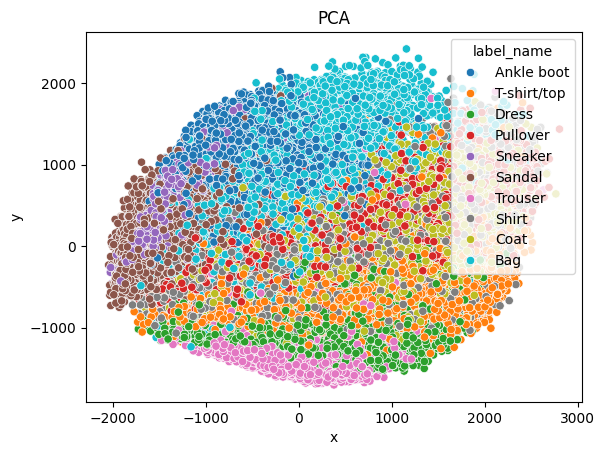

In [11]:
sns.scatterplot(x='x', y='y', hue='label_name', data=pca2D_df)
plt.title("PCA")
plt.show()

В пратических задачах перед выполнением процедуры снижения размерности исходный набор данных необходимо центрировать и нормализовать

In [12]:
# Центрирование и нормализация данных перед использованием PCA
data_for_PCA = train_data.reshape([train_data.shape[0], train_data.shape[1] * train_data.shape[2]])
data_for_PCA = np.divide(data_for_PCA, 255)
Dmean = data_for_PCA.mean(axis=0)
data_for_PCA = data_for_PCA - Dmean
label_for_PCA = train_labels

pca2D = PCA(n_components=2)
pca_2D = pca2D.fit_transform(data_for_PCA)
pca2D_df = pd.DataFrame(data = pca_2D, columns = ['x', 'y'])

pca2D_df['label'] = label_for_PCA
pca2D_df['label_name'] = pca2D_df['label'].apply(lambda x : lnames[x])
pca2D_df.head()

,x,y,label,label_name
0,-0.486250,6.404213,9,Ankle boot
1,5.521290,-1.771142,0,T-shirt/top
2,-2.846709,-4.320934,0,T-shirt/top
3,0.123132,-3.847324,3,Dress
4,3.153409,-4.710466,0,T-shirt/top


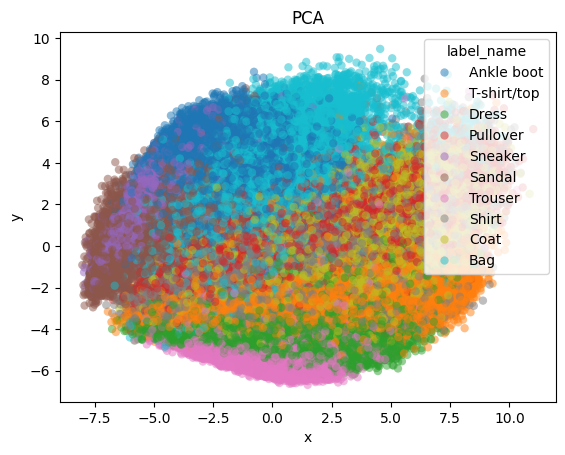

In [13]:
sns.scatterplot(x='x', y='y', hue='label_name', data=pca2D_df,
                alpha = 0.5, edgecolors='none')
plt.title("PCA")
plt.show()

Реализация PCA для тестового набора данных

In [14]:
# Центрирование и нормализация данных перед использованием PCA
data_for_PCA = test_data.reshape([test_data.shape[0], test_data.shape[1] * test_data.shape[2]])
data_for_PCA = np.divide(data_for_PCA, 255)
Dmean = data_for_PCA.mean(axis=0)
data_for_PCA = data_for_PCA - Dmean
label_for_PCA = test_labels

pca2D = PCA(n_components=2)
pca_2D = pca2D.fit_transform(data_for_PCA)
pca2D_df = pd.DataFrame(data = pca_2D, columns = ['x', 'y'])

pca2D_df['label'] = label_for_PCA
pca2D_df['label_name'] = pca2D_df['label'].apply(lambda x : lnames[x])
pca2D_df.head()

,x,y,label,label_name
0,-5.866705,2.510795,9,Ankle boot
1,7.313792,4.227865,2,Pullover
2,1.524610,-6.009395,1,Trouser
3,-1.320254,-5.977976,1,Trouser
4,1.049369,0.398204,6,Shirt


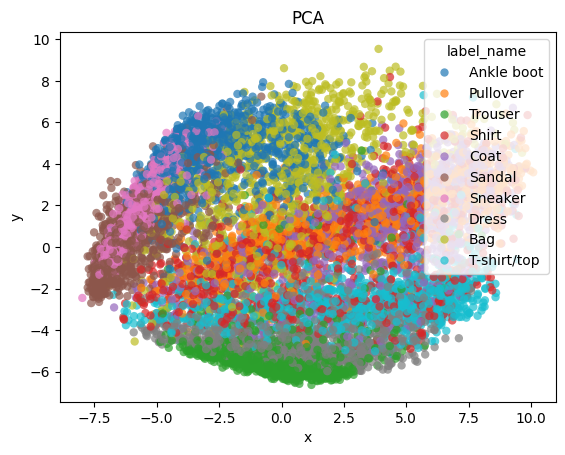

In [15]:
sns.scatterplot(x='x', y='y', hue='label_name', data=pca2D_df,
                alpha = 0.7, edgecolors='none')
plt.title("PCA")
plt.show()

## Индивидуальное задание

Выполните индивидуальное задание. Для этого необходимо реализовать следующие этапы:

1.   Реализуйте процедуры снижения размерности для набора данных Fashion-MNIST с использованием методов снижения размерности: ICA, TruncatedSVD, MDS, t-SNE, UMAP
2.   Подобрать набор данных с изображениями
3.   Реализовать визуализацию набора данных с использованием одного из методов снижения размерности: ICA, TruncatedSVD, MDS, t-SNE, UMAP

